In [10]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

## <Class1 : 가구/침구/인테리어>

In [54]:
Class1 = pd.read_csv('C:/Users/wjssm/Desktop/lpoint/modeling/Class1.csv')
Class1.head()

,BUY_CT_sum,HITS_SEQ_mean,TOT_SESS_HR_V_mean,CLNT_AGE_mean,furniture
0,1306,74.850340,1719.490868,35.022676,88.000000
1,2280,67.553411,1756.592258,34.607465,88.000000
2,1615,70.748404,1703.317481,34.291188,83.111111
3,2079,59.063566,1525.807812,34.294574,83.111111
4,4097,66.813036,1678.644214,34.150943,80.666667


In [12]:
Class1.shape

(183, 5)

In [13]:
import datetime as dt

In [14]:
pd.date_range('2018-04-01', '2018-09-30').strftime('%Y-%m-%d')

Index(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
       '2018-04-06', '2018-04-07', '2018-04-08', '2018-04-09', '2018-04-10',
       ...
       '2018-09-21', '2018-09-22', '2018-09-23', '2018-09-24', '2018-09-25',
       '2018-09-26', '2018-09-27', '2018-09-28', '2018-09-29', '2018-09-30'],
      dtype='object', length=183)

In [75]:
Class1['Date'] = pd.date_range('2018-04-01', '2018-09-30').strftime('%Y-%m-%d')
Class1['Date'] =pd.to_datetime(Class1['Date'])
Class1 = Class1.set_index('Date')

In [76]:
Class1.head()

,BUY_CT_sum,HITS_SEQ_mean,TOT_SESS_HR_V_mean,CLNT_AGE_mean,furniture
Date,,,,,
2018-04-01,1306,74.850340,1719.490868,35.022676,88.000000
2018-04-02,2280,67.553411,1756.592258,34.607465,88.000000
2018-04-03,1615,70.748404,1703.317481,34.291188,83.111111
2018-04-04,2079,59.063566,1525.807812,34.294574,83.111111
2018-04-05,4097,66.813036,1678.644214,34.150943,80.666667


In [16]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    diff.append(dataset[0])
    for i in range(interval, len(dataset)):
            value = dataset[i] - dataset[i - interval]
            diff.append(value)
    return pd.Series(diff)

In [17]:
# inverse_difference
def inverse_difference(diff, interval=1):
    origin = list()
    origin.append(diff[0])
    for i in range(interval, len(diff)):
            value = diff[i] + origin[i - interval]
            origin.append(value)
    return pd.Series(origin)

In [18]:
import matplotlib.pyplot as plt

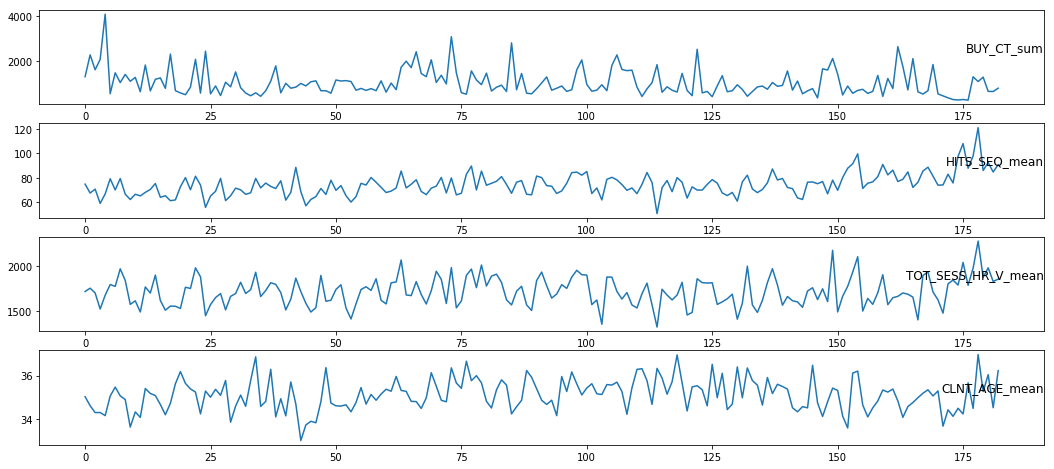

In [59]:
#Plot of all variables
values = Class1.values
# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(Class1.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

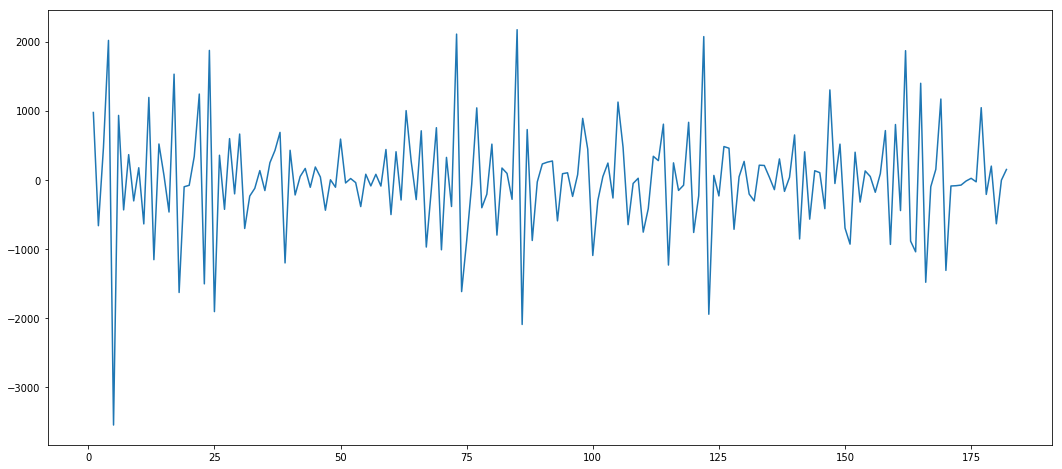

In [77]:
#with diff
Y = Class1['BUY_CT_sum']
diff = difference(Y)[1:]
plt.plot(diff)
plt.show()

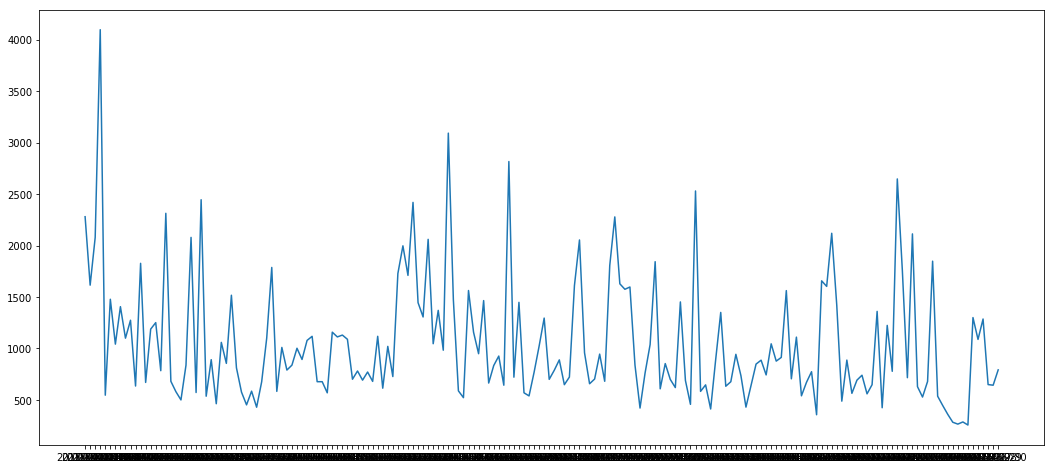

In [65]:
#without diff
plt.plot(Y[1:])
plt.show()

In [78]:
diff=difference(Y)
diff.index=Class1.index
df1=pd.concat([Class1,diff],axis=1)
df1.head()

,BUY_CT_sum,HITS_SEQ_mean,TOT_SESS_HR_V_mean,CLNT_AGE_mean,furniture,0
Date,,,,,,
2018-04-01,1306,74.850340,1719.490868,35.022676,88.000000,1306
2018-04-02,2280,67.553411,1756.592258,34.607465,88.000000,974
2018-04-03,1615,70.748404,1703.317481,34.291188,83.111111,-665
2018-04-04,2079,59.063566,1525.807812,34.294574,83.111111,464
2018-04-05,4097,66.813036,1678.644214,34.150943,80.666667,2018


In [79]:
#make dataset 'df1' with diff
diff.index=Class1.index
df1=pd.concat([Class1,diff],axis=1)
df1.rename(columns={0: 'diff_Y'}, inplace=True)
df1.head()

,BUY_CT_sum,HITS_SEQ_mean,TOT_SESS_HR_V_mean,CLNT_AGE_mean,furniture,diff_Y
Date,,,,,,
2018-04-01,1306,74.850340,1719.490868,35.022676,88.000000,1306
2018-04-02,2280,67.553411,1756.592258,34.607465,88.000000,974
2018-04-03,1615,70.748404,1703.317481,34.291188,83.111111,-665
2018-04-04,2079,59.063566,1525.807812,34.294574,83.111111,464
2018-04-05,4097,66.813036,1678.644214,34.150943,80.666667,2018


In [80]:
#remove original Y
df1.drop(columns=['BUY_CT_sum'],inplace=True)
df1.rename(columns = {'furniture' : 'naver_click'}, inplace=True)
df1.head()

,HITS_SEQ_mean,TOT_SESS_HR_V_mean,CLNT_AGE_mean,naver_click,diff_Y
Date,,,,,
2018-04-01,74.850340,1719.490868,35.022676,88.000000,1306
2018-04-02,67.553411,1756.592258,34.607465,88.000000,974
2018-04-03,70.748404,1703.317481,34.291188,83.111111,-665
2018-04-04,59.063566,1525.807812,34.294574,83.111111,464
2018-04-05,66.813036,1678.644214,34.150943,80.666667,2018


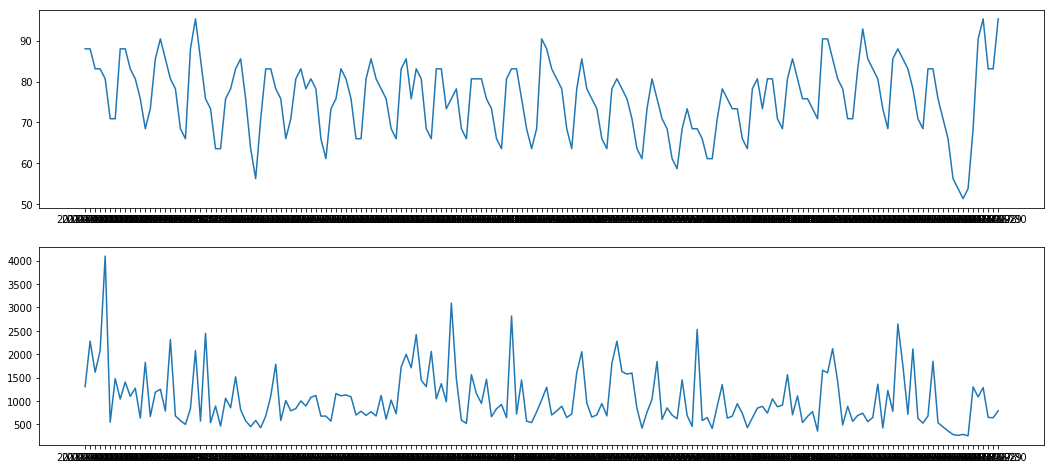

In [69]:
plt.subplot(211)
plt.plot(df1['naver_click'])
plt.subplot(212)
plt.plot(Y)

#### 1.ACF

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

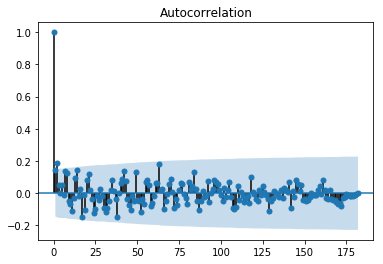

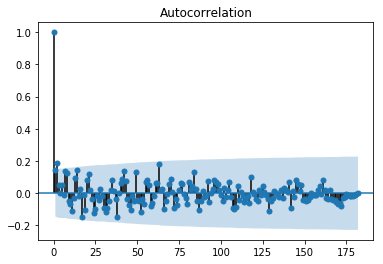

In [26]:
#original data
plot_acf(Y, ax = plt.gca())

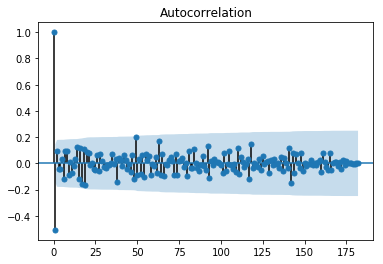

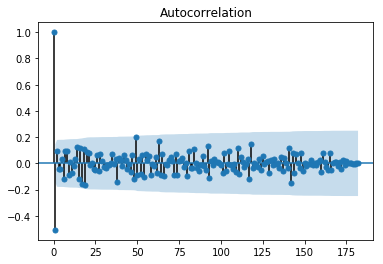

In [27]:
#difference data
plot_acf(df1['diff_Y'], ax = plt.gca())

### 2. scale

In [28]:
def minmax(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    return dataNorm

In [81]:
scaled_df1=minmax(df1)
#(xi–mean(x))/stdev(x)
scaled_df1.head()

,HITS_SEQ_mean,TOT_SESS_HR_V_mean,CLNT_AGE_mean,naver_click,diff_Y
Date,,,,,
2018-04-01,0.342822,0.413383,0.509541,0.833333,0.848532
2018-04-02,0.239338,0.452389,0.404708,0.833333,0.790531
2018-04-03,0.284649,0.396380,0.324854,0.722222,0.504193
2018-04-04,0.118936,0.209758,0.325709,0.722222,0.701433
2018-04-05,0.228838,0.370440,0.289445,0.666667,0.972921


In [82]:
scaled_Y = minmax(Y)

In [93]:
def inverse_minmax(norm,dataset):
    deNorm=norm*(dataset.max()-dataset.min())+dataset.min()
    return deNorm

In [94]:
inverse_minmax(scaled_df1,df1).head()

,HITS_SEQ_mean,TOT_SESS_HR_V_mean,CLNT_AGE_mean,naver_click,diff_Y
2018-04-01,74.850340,1719.490868,35.022676,88.000000,1306.0
2018-04-02,67.553411,1756.592258,34.607465,88.000000,974.0
2018-04-03,70.748404,1703.317481,34.291188,83.111111,-665.0
2018-04-04,59.063566,1525.807812,34.294574,83.111111,464.0
2018-04-05,66.813036,1678.644214,34.150943,80.666667,2018.0


### 3.plot

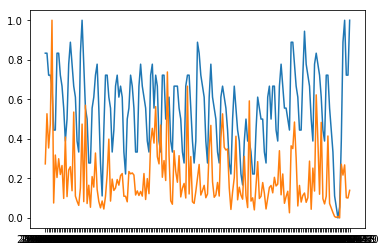

In [39]:
plt.plot(scaled_df1['naver_click'])
plt.plot(scaled_Y)

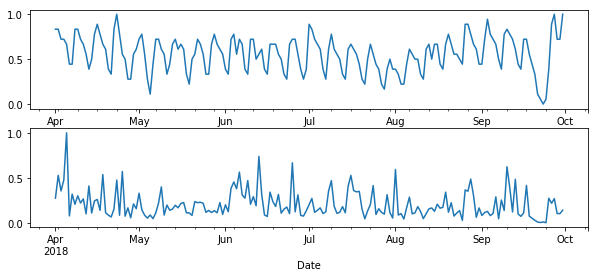

In [86]:
#scaled plot
plt.subplot(211)
scaled_df1['naver_click'].plot(figsize=(10, 4))
plt.subplot(212)
scaled_Y.plot(figsize=(10,4))

In [46]:
import statsmodels.api as sm
from pylab import rcParams

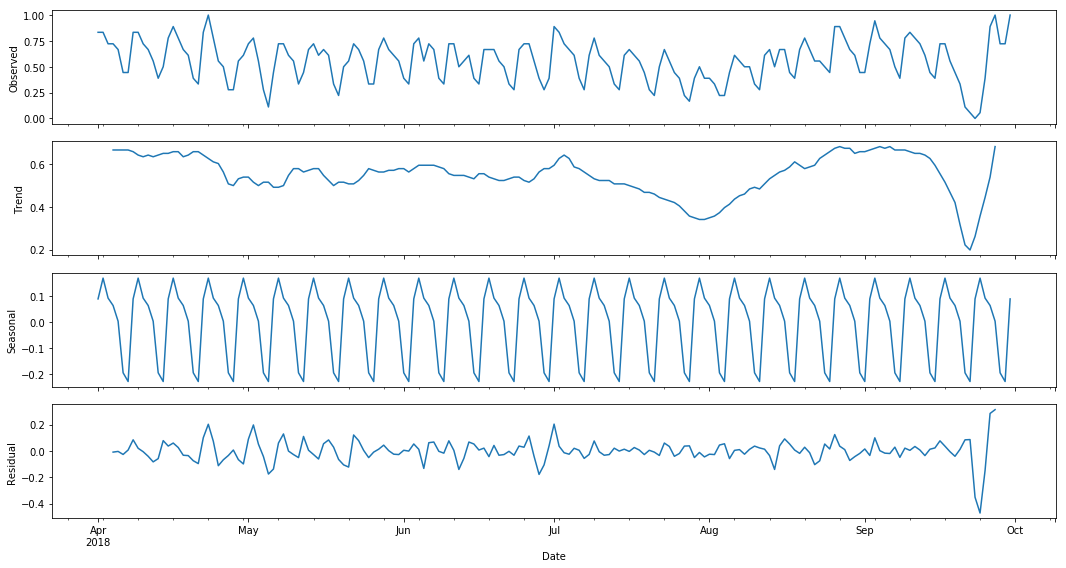

In [87]:
rcParams['figure.figsize'] = 15, 8
decomposition = sm.tsa.seasonal_decompose(scaled_df1['naver_click'], model='additive')
fig = decomposition.plot()
plt.show()

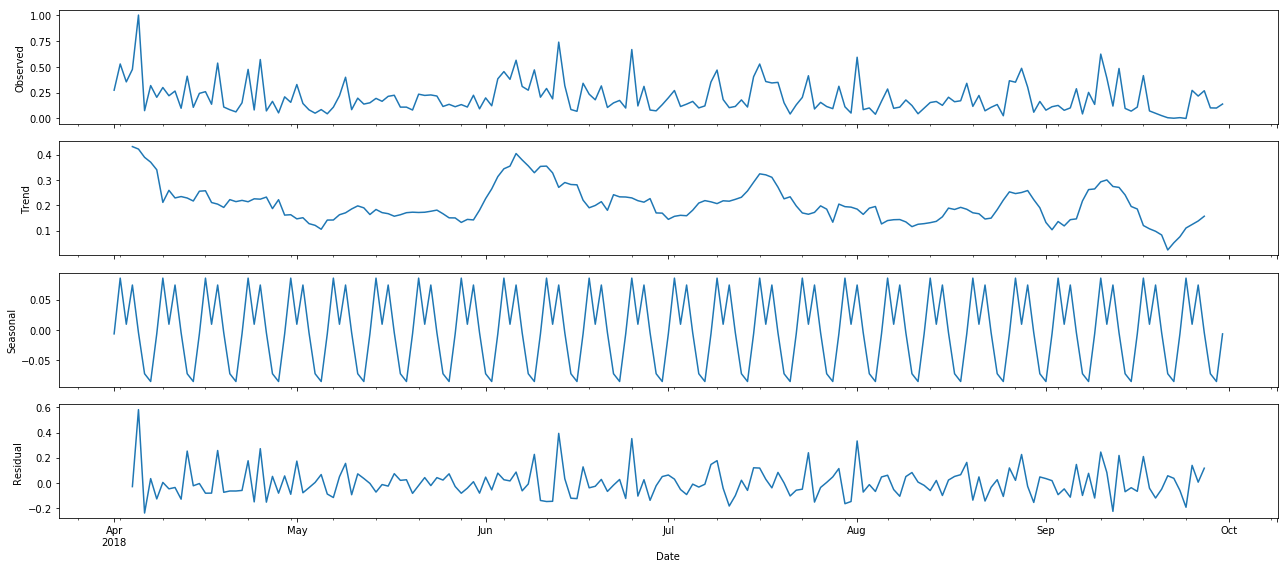

In [84]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(scaled_Y, model='additive')
fig = decomposition.plot()
plt.show()

In [40]:
np.corrcoef(scaled_df1['naver_click'],scaled_Y)

array([[1.        , 0.39512501],
       [0.39512501, 1.        ]])

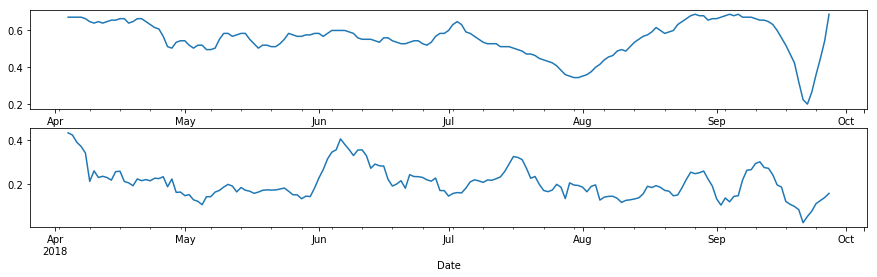

In [92]:
rcParams['figure.figsize'] = 15, 4

plt.subplot(211)
decomposition = sm.tsa.seasonal_decompose(scaled_df1['naver_click'], model='additive')
fig = decomposition.trend.plot()
plt.subplot(212)
decomposition = sm.tsa.seasonal_decompose(scaled_Y, model='additive')
fig = decomposition.trend.plot()

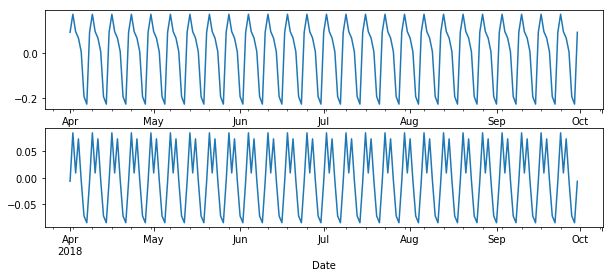

In [91]:
rcParams['figure.figsize'] = 10, 4

plt.subplot(211)
decomposition = sm.tsa.seasonal_decompose(scaled_df1['naver_click'], model='additive',)
fig = decomposition.seasonal.plot()
plt.subplot(212)
decomposition = sm.tsa.seasonal_decompose(scaled_Y, model='additive')
fig = decomposition.seasonal.plot()

### 3. modeling

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

### with the scaled data

In [98]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [105]:
dataset=scaled_df1

In [106]:
dataset.head()

,HITS_SEQ_mean,TOT_SESS_HR_V_mean,CLNT_AGE_mean,naver_click,diff_Y
2018-04-01,0.342822,0.413383,0.509541,0.833333,0.848532
2018-04-02,0.239338,0.452389,0.404708,0.833333,0.790531
2018-04-03,0.284649,0.396380,0.324854,0.722222,0.504193
2018-04-04,0.118936,0.209758,0.325709,0.722222,0.701433
2018-04-05,0.228838,0.370440,0.289445,0.666667,0.972921


In [107]:
values = dataset.values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.342822,0.413383,0.509541,0.833333,0.848532,0.239338,0.452389,0.404708,0.833333,0.790531
2,0.239338,0.452389,0.404708,0.833333,0.790531,0.284649,0.396380,0.324854,0.722222,0.504193
3,0.284649,0.396380,0.324854,0.722222,0.504193,0.118936,0.209758,0.325709,0.722222,0.701433
4,0.118936,0.209758,0.325709,0.722222,0.701433,0.228838,0.370440,0.289445,0.666667,0.972921
5,0.228838,0.370440,0.289445,0.666667,0.972921,0.405581,0.494630,0.516516,0.444444,0.000000


In [ ]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[6,7]], axis=1, inplace=True)
print(reframed.head())